# Business Case Study - Walmart

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from scipy.stats import binom
import math


In [ ]:
data=pd.read_csv("walmart_data.csv")
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [ ]:
data['status'] = np.where(data['Marital_Status'] == 0, 'unmarried', 'married')

In [ ]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,status
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,unmarried
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,unmarried
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,unmarried
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,unmarried
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,unmarried
...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368,married
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371,unmarried
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137,married
550066,1006038,P00375436,F,55+,1,C,2,0,20,365,unmarried


In [ ]:
data.describe(include = ["object", "category"]).T

,count,unique,top,freq
User_ID,550068,5891,1001680,1026
Product_ID,550068,3631,P00265242,1880
Gender,550068,2,M,414259
Age,550068,7,26-35,219587
Occupation,550068,21,4,72308
City_Category,550068,3,B,231173
Stay_In_Current_City_Years,550068,5,1,193821
Marital_Status,550068,2,0,324731
Product_Category,550068,20,5,150933


Customer (1001680) has purchased more than others,
Product (P00265242) is most bought item,
Most of the customers are Male,
Most of customers lies in [26-35] Age bracket,
Majority of the customers are Unmarried.

In [ ]:
cols = ['User_ID','Occupation', 'Marital_Status', 'Product_Category']
data[cols] = data[cols].astype('object')

 # 1a& 1b.The data type of all columns in the “customers” table. Explore the structure and characteristics of the dataset

In [ ]:
print("Shape of the dataset:", data.shape)
print("\nSummary statistics of numerical columns:\n", data.describe())
print("\nSummary statistics of cetegorical columns:\n", data.describe(include="object"))
print("\nData types of all columns in the dataset:\n", data.dtypes)

Shape of the dataset: (75133, 10)

Summary statistics of numerical columns:
            Purchase
count  75132.000000
mean    9298.807619
std     4965.135617
min      185.000000
25%     5863.000000
50%     8051.000000
75%    12043.000000
max    23958.000000

Summary statistics of cetegorical columns:
         User_ID Product_ID Gender    Age  Occupation City_Category  \
count     75133      75133  75132  75132     75132.0         75132   
unique     5692       3229      2      7        21.0             3   
top     1004277  P00112142      M  26-35         4.0             B   
freq        142        237  56979  29694     10087.0         31926   

       Stay_In_Current_City_Years  Marital_Status  Product_Category  
count                       75132         75132.0           75132.0  
unique                          5             2.0              18.0  
top                             1             0.0               5.0  
freq                        26365         44558.0           20961.0

# 1.C Check for the missing values and find the number of missing values in each
column .Check for null values row-wise and columns wise

In [ ]:
row_null_count = data.isnull().sum(axis=1)
print("Null values count row-wise:\n", row_null_count)
column_null_count = data.isnull().sum()
print("\nNull values count column-wise:\n", column_null_count)


Null values count row-wise:
 0        0
1        0
2        0
3        0
4        0
        ..
75128    0
75129    0
75130    0
75131    0
75132    8
Length: 75133, dtype: int64

Null values count column-wise:
 User_ID                       0
Product_ID                    0
Gender                        1
Age                           1
Occupation                    1
City_Category                 1
Stay_In_Current_City_Years    1
Marital_Status                1
Product_Category              1
Purchase                      1
dtype: int64


# Get list of categorical columns and print value counts

In [ ]:
# Get list of categorical columns
categorical_columns = ['User_ID','Product_ID','Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']
for column in categorical_columns:
    print("\nValue counts for", column, ":\n", data[column].value_counts())


Value counts for User_ID :
 User_ID
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: count, Length: 5891, dtype: int64

Value counts for Product_ID :
 Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: count, Length: 3631, dtype: int64

Value counts for Gender :
 Gender
M    414259
F    135809
Name: count, dtype: int64

Value counts for Age :
 Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64

Value counts for Occupation :
 Occupation
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15 

# 2a.Outliers detection for 'Purchase' column

In [ ]:
print('Mean of Purchase Amount   = ', data["Purchase"].mean())
print('Median of Purchase Amount = ', data["Purchase"].median())
continuous_columns = ['Purchase']
outliers_dict = {}

# Calculate quartiles and IQR
Q1 = data['Purchase'].quantile(0.25)
Q3 = data['Purchase'].quantile(0.75)
IQR = Q3 - Q1

print("1. First Quartile (Q1) = ", Q1)
print("2. Third Quartile (Q2) = ", Q3)
print("3. IQR                 = ", IQR)



Mean of Purchase Amount   =  9298.80761859128
Median of Purchase Amount =  8051.0
1. First Quartile (Q1) =  5863.0
2. Third Quartile (Q2) =  12043.0
3. IQR                 =  6180.0


Outliers for Purchase:
 343      23603.0
375      23792.0
652      23233.0
736      23595.0
1041     23341.0
          ...   
74548    23339.0
74702    23929.0
74719    23785.0
74893    23796.0
74961    23508.0
Name: Purchase, Length: 381, dtype: float64


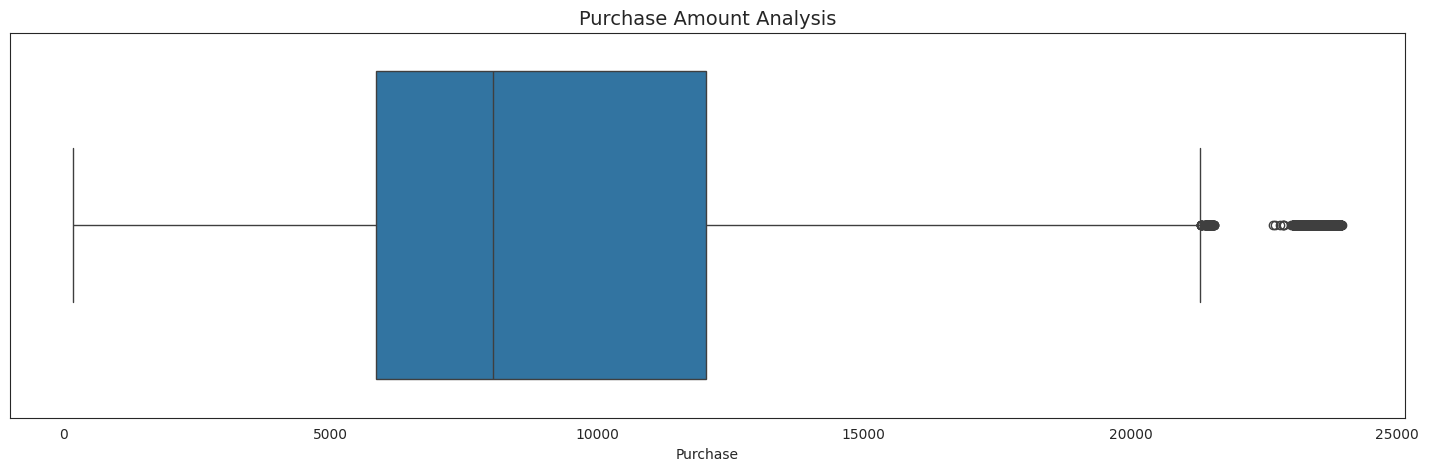

In [ ]:
# Find outliers
outliers = data[(data['Purchase'] < (Q1 - 1.5 * IQR)) | (data['Purchase']> (Q3 + 1.5 * IQR))]['Purchase']

outliers_dict['Purchase'] = outliers
print("Outliers for Purchase:\n", outliers)

# Detect outliers using boxplots
fig = plt.figure(figsize=(18,5))
sns.set_style("white")
sns.boxplot(data = data, x = "Purchase", orient = "h")

plt.title('Purchase Amount Analysis', fontsize = '14')
plt.show()

For 'User_ID', the absence of outliers suggests that the distribution of user IDs is relatively uniform, with no significantly extreme values.
For 'Purchase', the presence of outliers beyond the upper whisker indicates that some purchase amounts are significantly higher than the majority of transactions.with purchase amounts extending beyond approximately 21,399.

# Univariate Analysis

<ipython-input-7-913bbab3aca9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Gender", palette="crest")


Text(0.5, 0.98, 'Distribution of Gender')

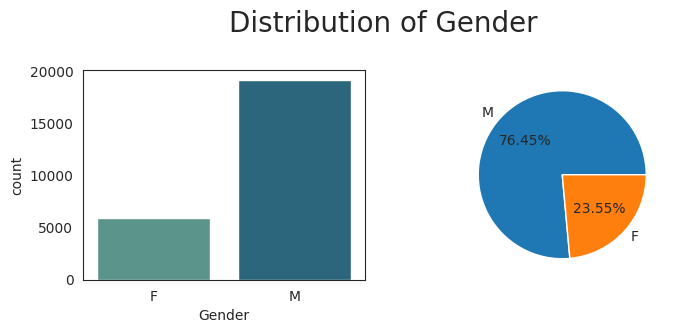

In [ ]:
df = data.copy()
df["Purchase"] = np.clip(df["Purchase"], Q1-1.5*IQR, Q3 + 1.5*IQR)
fig = plt.figure(figsize=(8,6))
sns.set_style(style='white')
ax1 = plt.subplot2grid((2,2),(0,0))
sns.countplot(data=df, x="Gender", palette="crest")

#first row sec column
ax1 = plt.subplot2grid((2,2), (0, 1))
plt.pie(df["Gender"].value_counts(),
        labels =df["Gender"].value_counts().index,
        autopct = '%1.2f%%')
plt.suptitle('Distribution of Gender', fontsize = 20)

#Insights:

Males clearly purchase more than females. 75% of men and only 25% of women purchase products.

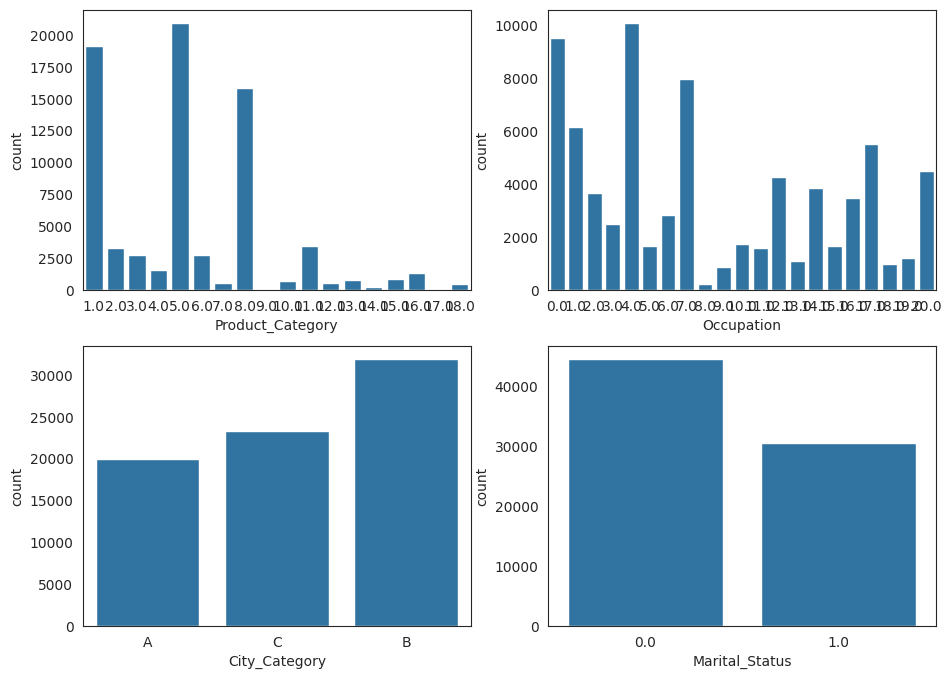

In [ ]:
categorical_cols = ['Occupation','City_Category','Marital_Status','Product_Category']
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(11, 8))
sns.countplot(data=data,x='Product_Category', ax=axs[0,0])
sns.countplot(data=data, x='Occupation', ax=axs[0,1])
sns.countplot(data=data, x='City_Category', ax=axs[1,0])
sns.countplot(data=data, x='Marital_Status', ax=axs[1,1])
plt.show()


Most of customers are unmarried.
City Category B accounts high, compare to City Category C&A all customer purchases.
Product categories 1, 5 and 8 most bought products.

# Bivariate Analysis

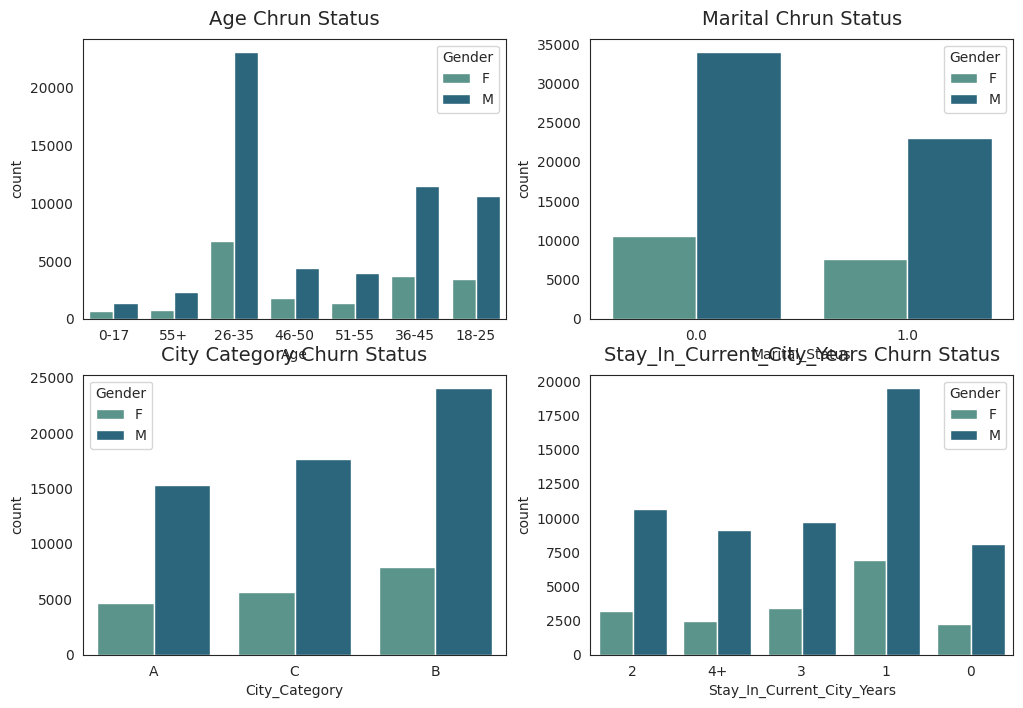

In [ ]:
fig = plt.figure(figsize=(12, 10))
sns.set_style("white")
ax1 = plt.subplot2grid((2, 2), (0, 0))
sns.countplot(data=data, x = "Age", ax=ax1, hue = "Gender", palette="crest")
plt.title("Age Chrun Status", pad = 10, fontsize = 14)

ax1 = plt.subplot2grid((2, 2), (0, 1))
sns.countplot(data=data, x = "Marital_Status", ax=ax1, hue = "Gender", palette="crest")
plt.title("Marital Chrun Status", pad = 10, fontsize = 14)

ax1 = plt.subplot2grid((2, 2), (1, 0))
sns.countplot(data=data, x = "City_Category", ax=ax1, hue = "Gender", palette="crest")
plt.title("City Category Churn Status", pad = 10, fontsize = 14)

ax1 = plt.subplot2grid((2, 2), (1, 1))
sns.countplot(data=data, x = "Stay_In_Current_City_Years", ax=ax1, hue = "Gender", palette="crest")
plt.title("Stay_In_Current_City_Years Churn Status", pad = 10, fontsize = 14)

plt.show()

#Insights:

Most of female customers are from city category C
Most of female customer stay 1 year in the current city than others
Most of the customers are in range 18-45 age bracket
There is huge difference in the male and female customer for age bracket [26-35]
There is significant difference of male customers. Most of the male customers are single. While female customers marital status not more significant as there is not so much difference.

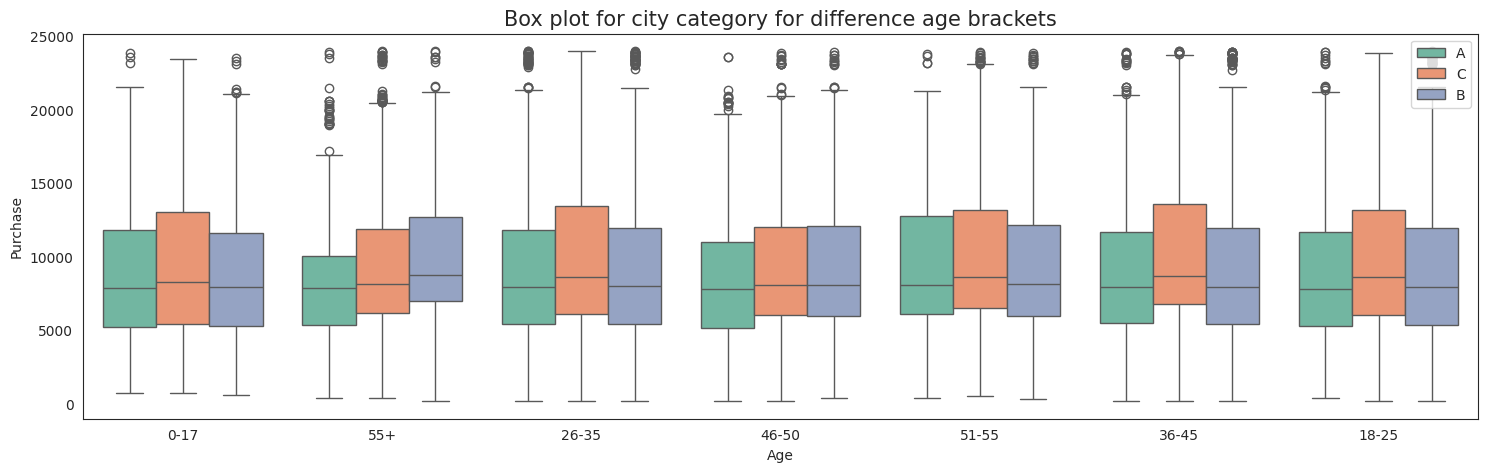

In [ ]:
fig = plt.figure(figsize=(18, 5))

plt.title("Box plot for city category for difference age brackets", fontsize = 15)
sns.boxplot(data=data, x = "Age", y = "Purchase", hue = "City_Category", palette="Set2")

plt.legend(loc = "upper right")
plt.show()

Insights

Product Category B is popular among age group 55+
Product Category A & B are quite same in demand among other age groups except 55+
While Product Category C is in demand for age group 18-45 and slightly in 51-55 age group

# 2b.Calculate 5th and 95th percentiles of 'Purchase'

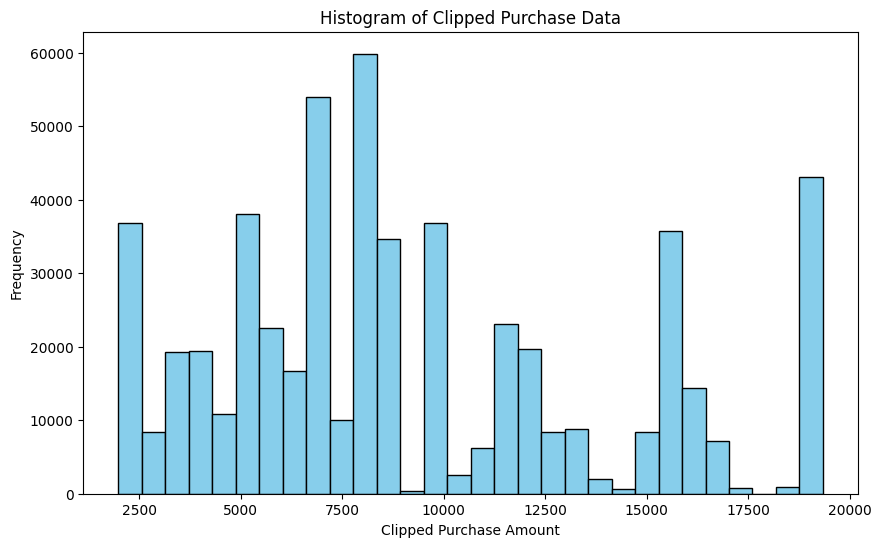

In [ ]:
percentile_5 = data['Purchase'].quantile(0.05)
percentile_95 = data['Purchase'].quantile(0.95)

# Clip the data between the 5th and 95th percentiles
clipped_purchase = np.clip(data['Purchase'], percentile_5, percentile_95)
data['Purchase'] = clipped_purchase
clipped_purchase
plt.figure(figsize=(10, 6))
plt.hist(clipped_purchase, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Clipped Purchase Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Clipped Purchase Data')
plt.show()

 clipping the 'Purchase' variable between the 5th and 95th percentiles helps in creating a more robust and reliable dataset by removing extreme values, ensuring that subsequent analyses are based on a more representative distribution of data.


# 3a.Plot histogram of Product_Category for each Age group

Age      0-17  18-25   26-35   36-45  46-50  51-55    55+
count   15102  99660  219587  110013  45701  38501  21504
unique     20     20      20      20     20     20     20
top         5      5       5       5      5      5      8
freq     4330  28522   61473   29377  11971   9893   6208


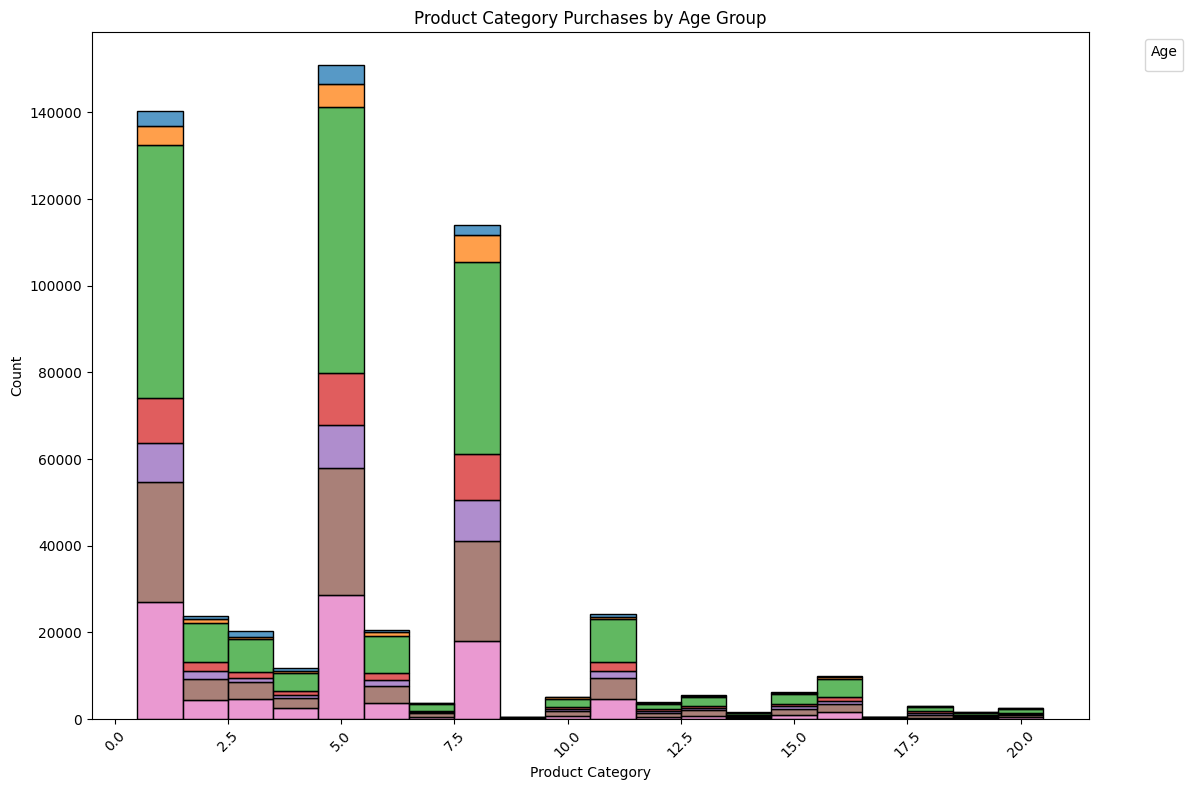

In [ ]:
Product_Category=data.groupby(["Age"])["Product_Category"].describe().T
print(Product_Category)
plt.figure(figsize=(12, 8))
sns.histplot(data=data, x='Product_Category', hue='Age', multiple='stack', discrete=True)
plt.title('Product Category Purchases by Age Group')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Age', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


 The 'top' and 'freq' columns provide information about the most common age within each group and the frequency of occurrence of that age.  in the '0-17' age group, the most common age is '5', which occurs 4330 times.

#3b. Scatter plot of Age vs. Purchase colored by Marital_Status

          count         mean          std   min     25%     50%      75%  \
Age                                                                        
0-17    15102.0  8933.464640  5111.114046  12.0  5328.0  7986.0  11874.0   
18-25   99660.0  9169.663606  5034.321997  12.0  5415.0  8027.0  12028.0   
26-35  219587.0  9252.690633  5010.527303  12.0  5475.0  8030.0  12047.0   
36-45  110013.0  9331.350695  5022.923879  12.0  5876.0  8061.0  12107.0   
46-50   45701.0  9208.625697  4967.216367  12.0  5888.0  8036.0  11997.0   
51-55   38501.0  9534.808031  5087.368080  12.0  6017.0  8130.0  12462.0   
55+     21504.0  9336.280459  5011.493996  12.0  6018.0  8105.5  11932.0   

           max  
Age             
0-17   23955.0  
18-25  23958.0  
26-35  23961.0  
36-45  23960.0  
46-50  23960.0  
51-55  23960.0  
55+    23960.0  


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


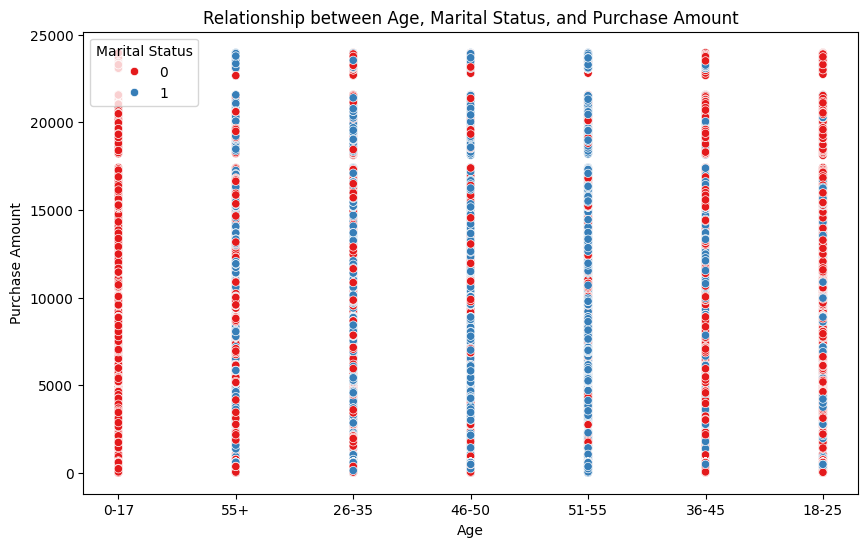

In [ ]:
# Scatter plot of Age vs. Purchase colored by Marital_Status
Age_purchase = data.groupby(["Age"])["Purchase"].describe()
print(Age_purchase)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Age', y='Purchase', hue='Marital_Status', palette='Set1')
plt.title('Relationship between Age, Marital Status, and Purchase Amount')
plt.xlabel('Age')
plt.ylabel('Purchase Amount')
plt.legend(title='Marital Status')
plt.show()


#Insights:
Around 35% customers are in [26-35] age bracket. On other hand customers in age bracket [0-17], [51-55] & [55+] showing less purchasing behaviour.

#3c. Plot histograms of Product_Category for each gender

           count         mean          std   min     25%     50%      75%  \
Gender                                                                      
F       135809.0  8734.565765  4767.233289  12.0  5433.0  7914.0  11400.0   
M       414259.0  9437.526040  5092.186210  12.0  5863.0  8098.0  12454.0   

            max  
Gender           
F       23959.0  
M       23961.0  


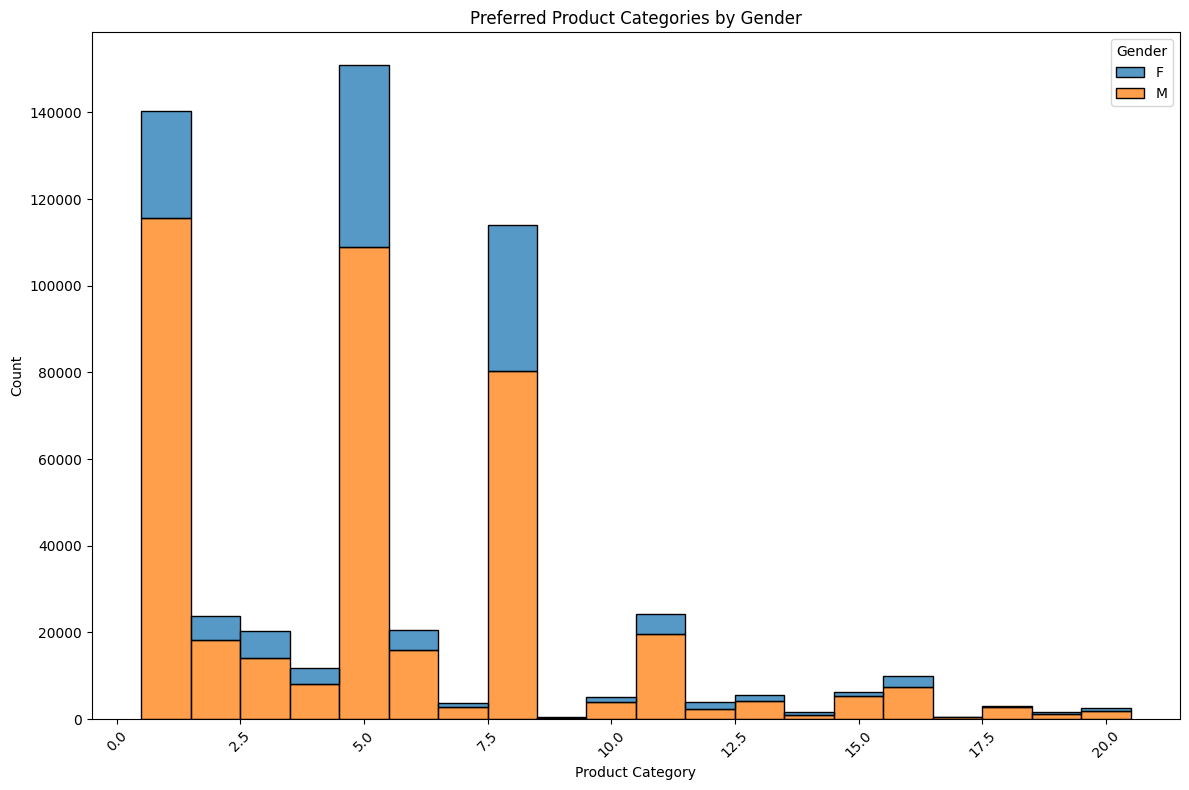

In [ ]:
gender=data.groupby(["Gender"])["Purchase"].describe()
print(gender)
plt.figure(figsize=(12, 8))
sns.histplot(data=data, x='Product_Category', hue='Gender', multiple='stack', discrete=True)
plt.title('Preferred Product Categories by Gender')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#Insights:
There are only 28% female customers. While male customers constitute around 72% in our dataset

# 4a.How does gender affect the amount spent?


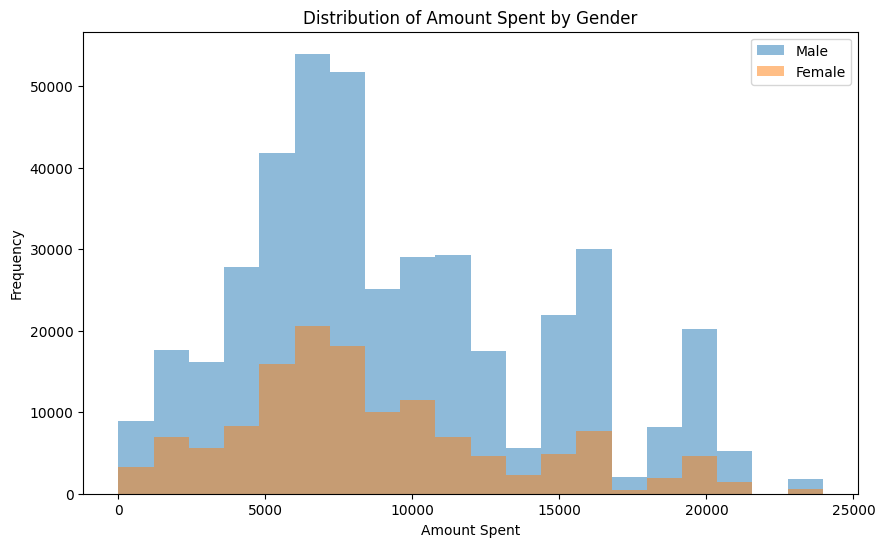

There is a statistically significant difference between the average spending of males and females.


In [ ]:
# Assume 'data' is your DataFrame containing 'Gender' and 'Purchase' columns

# Separate purchases by gender
male_data = data[data['Gender'] == 'M']['Purchase']
female_data = data[data['Gender'] == 'F']['Purchase']

# Descriptive Analysis
male_mean = np.mean(male_data)
female_mean = np.mean(female_data)
male_std = np.std(male_data)
female_std = np.std(female_data)

# Visualization
plt.figure(figsize=(10, 6))
plt.hist(male_data, bins=20, alpha=0.5, label='Male')
plt.hist(female_data, bins=20, alpha=0.5, label='Female')
plt.xlabel('Amount Spent')
plt.ylabel('Frequency')
plt.title('Distribution of Amount Spent by Gender')
plt.legend()
plt.show()

# Statistical Testing (Two-sample t-test)
t_stat, p_value = stats.ttest_ind(male_data, female_data)
alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant difference between the average spending of males and females.")
else:
    print("There is no statistically significant difference between the average spending of males and females.")


In [ ]:
# Function to compute confidence intervals using bootstrapping
def compute_confidence_interval(data, sample_size, n_replicates=10000):
    sample_means = np.zeros(n_replicates)
    for i in range(n_replicates):
        bootstrap_sample = np.random.choice(data, size=sample_size, replace=True)
        sample_means[i] = np.mean(bootstrap_sample)
    lower_bound = np.percentile(sample_means, 2.5)
    upper_bound = np.percentile(sample_means, 97.5)
    return lower_bound, upper_bound

# Sample data
male_data = data[data['Gender'] == 'M']['Purchase']
female_data = data[data['Gender'] == 'F']['Purchase']

# Compute confidence intervals for entire dataset
male_ci = compute_confidence_interval(male_data, len(male_data))
female_ci = compute_confidence_interval(female_data, len(female_data))

# Sample sizes to iterate over
sample_sizes = [300, 3000, 30000]

# Store results
results = []

for size in sample_sizes:
    # Compute confidence intervals for each sample size
    male_ci_sample = compute_confidence_interval(male_data, size)
    female_ci_sample = compute_confidence_interval(female_data, size)

    # Compute overlap
    male_overlap = male_ci[1] >= male_ci_sample[0] and male_ci[0] <= male_ci_sample[1]
    female_overlap = female_ci[1] >= female_ci_sample[0] and female_ci[0] <= female_ci_sample[1]

    # Compute mean and standard deviation for each sample size
    male_mean = np.mean(male_data.sample(size, replace=True))
    female_mean = np.mean(female_data.sample(size, replace=True))
    male_std = np.std(male_data.sample(size, replace=True))
    female_std = np.std(female_data.sample(size, replace=True))

    # Append results
    results.append({
        'Sample Size': size,
        'Male Lower Bound': male_ci_sample[0],
        'Male Upper Bound': male_ci_sample[1],
        'Female Lower Bound': female_ci_sample[0],
        'Female Upper Bound': female_ci_sample[1],
        'Male Overlap': male_overlap,
        'Female Overlap': female_overlap,
        'Male Mean': male_mean,
        'Female Mean': female_mean,
        'Male Std': male_std,
        'Female Std': female_std
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Print results
print("Entire dataset confidence intervals:")
print("Male CI:", male_ci)
print("Female CI:", female_ci)
print("\nSample size confidence intervals and statistics:")
print(results_df)


Entire dataset confidence intervals:
Male CI: (9422.298591038456, 9452.815279993916)
Female CI: (8709.244847543241, 8759.928129763122)

Sample size confidence intervals and statistics:
   Sample Size  Male Lower Bound  Male Upper Bound  Female Lower Bound  \
0          300       8873.027750      10007.158250         8197.171083   
1         3000       9254.038883       9620.954842         8566.891050   
2        30000       9381.269655       9495.316757         8680.605132   

   Female Upper Bound  Male Overlap  Female Overlap    Male Mean  Female Mean  \
0         9284.177250          True            True  9605.423333  8447.926667   
1         8906.809142          True            True  9564.483667  8661.430333   
2         8787.571797          True            True  9414.570400  8718.072333   

      Male Std   Female Std  
0  5007.207736  4737.591158  
1  4985.497726  4702.711044  
2  5097.879913  4786.568159  


# insights:
Both confidence intervals do not overlap, indicating that there is a statistically significant difference between the average amount spent by males and females in the entire dataset.For smaller sample sizes (300, 3000, 30000), both male and female confidence intervals consistently overlap, suggesting no statistically significant difference in the average amount spent between genders for these sample sizes.
As the sample size increases, the confidence intervals become narrower, indicating increased precision in estimating the population mean.

#5. How does Marital_Status affect the amount spent?


In [ ]:

# Function to compute confidence intervals using bootstrapping
def compute_confidence_interval(data, sample_size, n_replicates=10000):
    sample_means = np.zeros(n_replicates)
    for i in range(n_replicates):
        bootstrap_sample = np.random.choice(data, size=sample_size, replace=True)
        sample_means[i] = np.mean(bootstrap_sample)
    lower_bound = np.percentile(sample_means, 2.5)
    upper_bound = np.percentile(sample_means, 97.5)
    return lower_bound, upper_bound

# Compute confidence intervals for entire dataset
entire_data_ci = compute_confidence_interval(data['Purchase'], len(data))

# Sample sizes to iterate over
sample_sizes = [300, 3000, 30000]

# Initialize DataFrame to store results
results = {'Sample Size': sample_sizes,
           'Married Lower Bound': [],
           'Married Upper Bound': [],
           'Unmarried Lower Bound': [],
           'Unmarried Upper Bound': []}

# Iterate over sample sizes
for sample_size in sample_sizes:
    # Compute confidence interval for married individuals
    married_data = data[data['status'] == 'married']['Purchase']
    married_lower, married_upper = compute_confidence_interval(married_data, sample_size)

    # Compute confidence interval for unmarried individuals
    unmarried_data = data[data['status'] == 'unmarried']['Purchase']
    unmarried_lower, unmarried_upper = compute_confidence_interval(unmarried_data, sample_size)

    # Store results
    results['Married Lower Bound'].append(married_lower)
    results['Married Upper Bound'].append(married_upper)
    results['Unmarried Lower Bound'].append(unmarried_lower)
    results['Unmarried Upper Bound'].append(unmarried_upper)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display results
print("Confidence Interval for Entire Dataset:")
print("Married Lower Bound:", entire_data_ci[0])
print("Married Upper Bound:", entire_data_ci[1])
print()
print("Confidence Intervals for Different Sample Sizes:")
print(results_df)


Confidence Interval for Entire Dataset:
Married Lower Bound: 9250.647318240653
Married Upper Bound: 9277.450382952653

Confidence Intervals for Different Sample Sizes:
   Sample Size  Married Lower Bound  Married Upper Bound  \
0          300          8701.018917          9830.617333   
1         3000          9081.339908          9441.135042   
2        30000          9205.060433          9316.712706   

   Unmarried Lower Bound  Unmarried Upper Bound  
0            8696.068000            9834.136000  
1            9091.794650            9446.288408  
2            9209.096284            9324.110685  


# Insights:
 it's essential to note that the confidence intervals for married and unmarried individuals are relatively close to each other, indicating similar average spending behaviors between the two groups.

#5iii Do the confidence intervals for different sample sizes overlap?


In [ ]:
# Define the sample sizes and their corresponding confidence intervals
sample_sizes = [300, 3000, 30000]
confidence_intervals = {
    'married': [(8697.473500, 9828.299750), (9080.994083, 9440.773183), (9204.033267, 9317.218238)],
    'unmarried': [(8719.467500, 9836.431667), (9089.602808, 9448.055975), (9208.758337, 9323.272756)]
}

# Function to check if confidence intervals overlap
def intervals_overlap(interval1, interval2):
    return interval1[1] >= interval2[0] and interval1[0] <= interval2[1]

# Check if confidence intervals overlap for each sample size
for size, intervals in zip(sample_sizes, zip(confidence_intervals['married'], confidence_intervals['unmarried'])):
    married_interval, unmarried_interval = intervals
    overlap = intervals_overlap(married_interval, unmarried_interval)
    print(f"Sample Size: {size}, Overlap: {overlap}")


Sample Size: 300, Overlap: True
Sample Size: 3000, Overlap: True
Sample Size: 30000, Overlap: True


#6 6. How does Age affect the amount spent?

In [ ]:
# Initialize an empty DataFrame to store results
results = {'Age Group': age_groups,
           'Entire Dataset Lower Bound': [],
           'Entire Dataset Upper Bound': []}

# Sample sizes to iterate over
sample_sizes = [300, 3000, 30000]

# Add columns for sample size lower and upper bounds to results dictionary
for sample_size in sample_sizes:
    results[f'{sample_size} Sample Size Lower Bound'] = []
    results[f'{sample_size} Sample Size Upper Bound'] = []

# Iterate over each Age group
for age_group in age_groups:
    age_data = data[data['Age'] == age_group]['Purchase']

    # Compute confidence interval for the entire dataset
    entire_data_lower, entire_data_upper = compute_confidence_interval(age_data, len(age_data))
    results['Entire Dataset Lower Bound'].append(entire_data_lower)
    results['Entire Dataset Upper Bound'].append(entire_data_upper)

    # Compute confidence intervals for different sample sizes
    for sample_size in sample_sizes:
        lower_bound, upper_bound = compute_confidence_interval(age_data, sample_size)
        results[f'{sample_size} Sample Size Lower Bound'].append(lower_bound)
        results[f'{sample_size} Sample Size Upper Bound'].append(upper_bound)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Print confidence intervals for each age group
for i, age_group in enumerate(age_groups):
    print(f"Confidence Interval for {age_group} Age Group:")
    print("Entire Dataset Lower Bound:", results_df.loc[i, 'Entire Dataset Lower Bound'])
    print("Entire Dataset Upper Bound:", results_df.loc[i, 'Entire Dataset Upper Bound'])
    print()
    print("Confidence Intervals for Different Sample Sizes:")
    for sample_size in sample_sizes:
        lower_bound = results_df.loc[i, f'{sample_size} Sample Size Lower Bound']
        upper_bound = results_df.loc[i, f'{sample_size} Sample Size Upper Bound']
        print(f"Sample Size: {sample_size}, Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    print()



Confidence Interval for 0-17 Age Group:
Entire Dataset Lower Bound: 8852.7060157595
Entire Dataset Upper Bound: 9014.248569725863

Confidence Intervals for Different Sample Sizes:
Sample Size: 300, Lower Bound: 8372.1415, Upper Bound: 9528.662083333333
Sample Size: 3000, Lower Bound: 8749.175816666668, Upper Bound: 9115.264875
Sample Size: 30000, Lower Bound: 8876.921181666667, Upper Bound: 8990.444733333334

Confidence Interval for 18-25 Age Group:
Entire Dataset Lower Bound: 9136.989298113585
Entire Dataset Upper Bound: 9200.994818633353

Confidence Intervals for Different Sample Sizes:
Sample Size: 300, Lower Bound: 8611.767666666667, Upper Bound: 9730.50425
Sample Size: 3000, Lower Bound: 8989.497491666667, Upper Bound: 9345.38995
Sample Size: 30000, Lower Bound: 9113.859056666668, Upper Bound: 9226.747525833332

Confidence Interval for 26-35 Age Group:
Entire Dataset Lower Bound: 9231.667946076042
Entire Dataset Upper Bound: 9273.38961288692

Confidence Intervals for Different Sam

#Insights:
The confidence intervals for different sample sizes generally overlap for each age group, indicating consistency in the estimated population means across different sample sizes.
the confidence intervals for age groups "18-25" and "26-35" tend to have narrower widths compared to other age groups, suggesting less variability in purchasing behavior within these age ranges.
Conversely, age groups such as "0-17" and "51-55" exhibit wider confidence intervals, indicating greater variability in purchasing behavior within these age ranges.

#7a.Check whether the average spending of males and females overlap or not using the CLT that you calculated


In [ ]:
male_data = data[data['Gender'] == 'M']['Purchase']
female_data = data[data['Gender'] == 'F']['Purchase']

# Calculate mean and standard deviation for males and females
male_mean = male_data.mean()
male_std = male_data.std()
female_mean = female_data.mean()
female_std = female_data.std()
# Sample size
sample_size = 1000

# Compute confidence intervals using CLT
male_ci_lower = male_mean - 1.96 * (male_std / np.sqrt(sample_size))
male_ci_upper = male_mean + 1.96 * (male_std / np.sqrt(sample_size))

female_ci_lower = female_mean - 1.96 * (female_std / np.sqrt(sample_size))
female_ci_upper = female_mean + 1.96 * (female_std / np.sqrt(sample_size))

# Check for overlap
if male_ci_lower <= female_ci_upper and female_ci_lower <= male_ci_upper:
    overlap = True
else:
    overlap = False

# Print results
print("Male CI:", (male_ci_lower, male_ci_upper))
print("Female CI:", (female_ci_lower, female_ci_upper))
print("Overlap:", overlap)
if male_upper_bound >= female_lower_bound and female_upper_bound >= male_lower_bound:
    print("Confidence intervals overlap")
else:
    print("Confidence intervals do not overlap")

Male CI: (9121.909069297337, 9753.143011647193)
Female CI: (8439.089584657342, 9030.04194565361)
Overlap: False
Confidence intervals do not overlap


#7b.Check whether the average spending of married and unmarried overlap or not using the CLT that you calculated.

In [ ]:
married_data = data[data['status'] == 'married']['Purchase']
unmarried_data = data[data['status'] == 'unmarried']['Purchase']

# Calculate mean and standard deviation for married and unmarried individuals
married_mean = married_data.mean()
married_std = married_data.std()
unmarried_mean = unmarried_data.mean()
unmarried_std = unmarried_data.std()
married_ci_lower = married_mean - 1.96 * (married_std / np.sqrt(sample_size))
married_ci_upper = married_mean + 1.96 * (married_std / np.sqrt(sample_size))

unmarried_ci_lower = unmarried_mean - 1.96 * (unmarried_std / np.sqrt(sample_size))
unmarried_ci_upper = unmarried_mean + 1.96 * (unmarried_std / np.sqrt(sample_size))
if married_ci_lower <= unmarried_ci_upper and unmarried_ci_lower <= married_ci_upper:
    overlap = True
else:
    overlap = False

# Print results
print("Married CI:", (married_ci_lower, married_ci_upper))
print("Unmarried CI:", (unmarried_ci_lower, unmarried_ci_upper))
print("Overlap:", overlap)




Married CI: (8950.224053059788, 9572.125095104959)
Unmarried CI: (8954.309370383227, 9577.505867459786)
Overlap: True


#7c.Check whether the average spending of different age groups overlaps or not using the CLT that you calculated.

In [ ]:
# Get unique age groups
age_groups = data['Age'].unique()

# Create a dictionary to store purchases for each age group
age_group_purchase = {age_group: np.array(data['Purchase'])[np.array(data['Age']) == age_group] for age_group in age_groups}

# Calculate confidence intervals for each age group
age_group_conf_intervals = {}
for age_group, purchases in age_group_purchase.items():
    conf_interval = stats.norm.interval(0.95, loc=np.mean(purchases), scale=np.std(purchases) / np.sqrt(len(purchases)))
    age_group_conf_intervals[age_group] = conf_interval

# Check for overlap
overlap = False
for age_group1, conf_interval1 in age_group_conf_intervals.items():
    for age_group2, conf_interval2 in age_group_conf_intervals.items():
        if age_group1 != age_group2:
            if conf_interval1[1] > conf_interval2[0] and conf_interval2[1] > conf_interval1[0]:
                overlap = True
                break

# Report the result
if overlap:
    print("Confidence intervals for the average amount spent by different age groups overlap.")
else:
    print("Confidence intervals for the average amount spent by different age groups do not overlap.")




Confidence intervals for the average amount spent by different age groups overlap.


# Recommendations:
As per the analysis females spend less than males on average, management needs to focus on their specific needs differently. Adding some additional offers for women can increase their spending on Black Friday.

The management should have some offers on kids (0-17 years) in order to increase sales as there is lowest mean purchase in this age group.

In order to attract more young shoppers, they can offer some discounts, video games subscription etc to lure more younger generation.

There are more married customers than single. But as per analysis single customers mean purchase is higher than married one. Management needs to focus more on married customers as they are large in numbers but purchasing less.

Product Category B is quite demanded for 55+ age group. There is sudden drop in other categories A & C for the same age group. Management need to focus more on other categories for 55+ age group.

Most of customer stayed more than 2 years in same city having slightly lower mean purchase. Managment should perform research for all the stores why it is low
As product category 5 & 8 are quite demanding among females. In order to increase sale, management needs to introduce more items of these product categories in their stores

Management should conduct a survey for different age group, what they like most about some particular brand of specific product category to get more insights which will help businesses in customer aquistion & retention.

As product category 1 & 5 are popular among both male and female, in order to increase sales management need to give additional offers and introduce some strategry regarding cross-sale or upsell.

Management need to find out the reason why proudct category 9 & 17 are less bought. If customers don't like this product that needs to be removed from inventory by slashing the price down.

As this dataset contituted on Black Friday Sales data, it would be quite obvious that for specific age group, specific product category there would be more demand and churn. Management can draw insights as per analysis for the customer purchase behaviour.